In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dropout, Dense
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

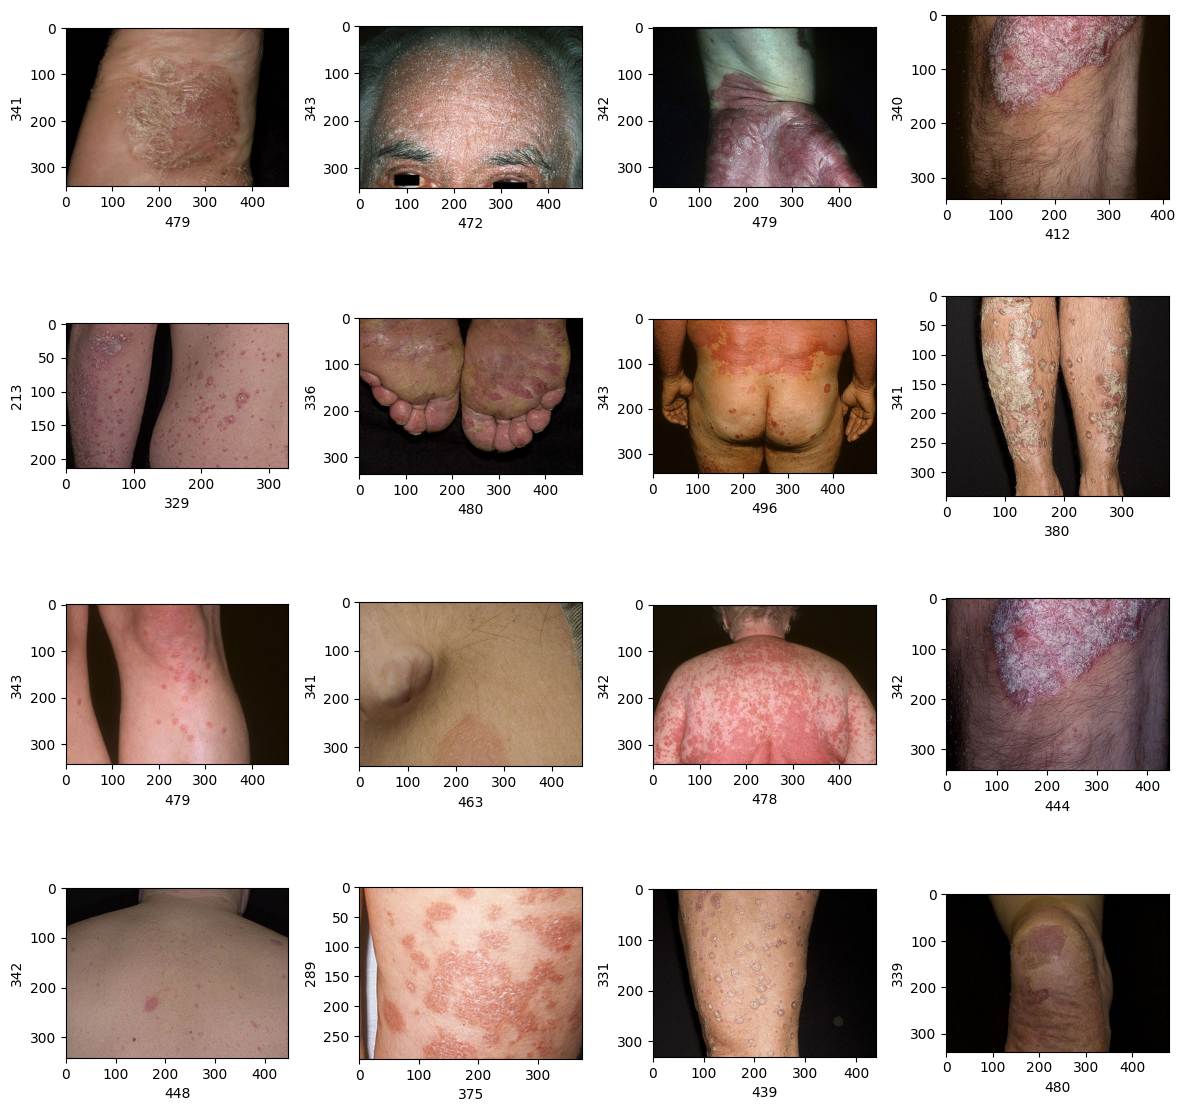

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/data/FinalDataset/Pso"
for i in range(1,17):
     plt.subplot(4,4,i)
     plt.tight_layout()
     rand_img = imread(path+'/'+random.choice(sorted(listdir(path))))
     plt.imshow(rand_img)
     plt.xlabel(rand_img.shape[1], fontsize = 10)
     plt.ylabel(rand_img.shape[0], fontsize = 10)


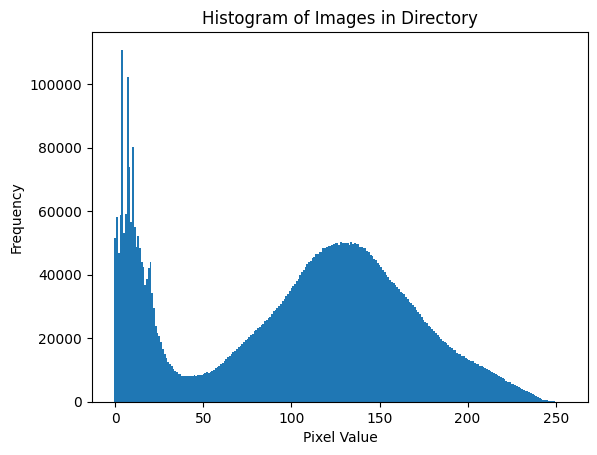

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from os import listdir

# Function to load, resize, and flatten images from a directory
def load_images(directory, target_size=(128, 128)):
    images = []
    for filename in listdir(directory):
        if filename.endswith(".jpg"):
            img_path = f"{directory}/{filename}"
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img, target_size)
            images.append(resized_img.flatten())
    return np.array(images)

# Directory containing images
path = "/content/drive/MyDrive/data/FinalDataset/Ecz"

# Load, resize, and flatten images from the specified directory
image_data = load_images(path)

# Check if the array is not empty before normalization
if image_data.size > 0:
    # Flatten pixel values without normalization
    image_data_flattened = image_data.flatten()

    # Calculate the histogram of the flattened image data
    histogram, bin_edges = np.histogram(image_data_flattened, bins=256, range=[0, 256])

    # Plot the histogram as a bar chart
    plt.bar(bin_edges[0:-1], histogram, width=1)
    plt.title('Histogram of Images in Directory')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Image data is empty.")


In [ ]:
dir = "/content/drive/MyDrive/data/FinalDataset"
root_dir = listdir(dir)

image_list, label_list = [], []
root_dir

['Ecz', 'Pso']

In [ ]:
label_list

array(['Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz',

In [ ]:
import seaborn as sns

df = pd.DataFrame({'Labels': label_list})
sns.countplot(data=df, x='Labels')
plt.title('Class Distribution')
plt.show()

ValueError: ignored

In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

In [ ]:

# # Reading and converting image to numpy array
for directory in root_dir:
  i=0
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    #image2 = image.load_img(image_path, target_size=(32,32))
    temp_image = cv2.imread(image_path)
    if (i%2==0):
      #flipping image up
      flip_vr=iaa.Flipud(p=1.0)
      image= flip_vr.augment_image(temp_image)
    else:
      # scaling image and flipping it horizontally
      #scale_im=iaa.Affine(scale={"x": (1.5, 1.5), "y": (1.5, 1.5)})
      #scaled_image =scale_im.augment_image(temp_image)
      flip_hr=iaa.Fliplr(p=1.0)
      image= flip_hr.augment_image(temp_image)
    try:
      resized=cv2.resize(image,(128,128))
      #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
    except Exception as e:
      print('Exception:',e)
    image = img_to_array(resized)
    image_list.append(image)
    label_list.append(directory)
    i=i+1
    if(i==1000):
      break

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

Ecz    400
Pso    400
dtype: int64

In [ ]:
num_classes = len(label_counts)
num_classes

2

In [ ]:
image_list[900].shape

IndexError: ignored

In [ ]:
label_list = np.array(label_list)
label_list.shape

(800,)

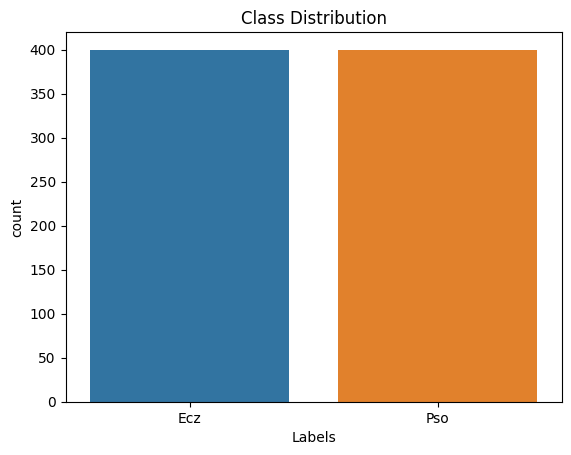

In [ ]:

df = pd.DataFrame({'Labels': label_list})
sns.countplot(data=df, x='Labels')
plt.title('Class Distribution')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.1, random_state=10)

In [ ]:
y_test

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
for img in x_train:
      img.shape

In [ ]:
x_train = np.array(x_train,dtype=np.float16).astype('float16') / 255.0
x_test = np.array(x_test,dtype=np.float16) / 255.0
x_train = x_train.reshape(-1,128,128,3)
x_test = x_test.reshape(-1,128,128,3)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['Ecz' 'Pso']


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from keras.applications.vgg16 import VGG16
# load the model
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(128, 128, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(1, 1))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.6)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False


#model = Sequential()
#model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Flatten())
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=3, activation="softmax"))




58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

sgd = optimizers.SGD(learning_rate= 0.0001,  momentum=0.9, nesterov=True)
model.compile( loss = "sparse_categorical_crossentropy",
               optimizer = sgd,
               metrics=['accuracy']
             )



In [ ]:
#training the model
epochs = 1000
batch_size = 128
history = model.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_val,y_val))

Epoch 1/1000
5/5 [==============================] - 17s 1s/step - loss: 1.6112 - accuracy: 0.3247 - val_loss: 0.9072 - val_accuracy: 0.5625
Epoch 2/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.9733 - accuracy: 0.4913 - val_loss: 0.8094 - val_accuracy: 0.4722
Epoch 3/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.8689 - accuracy: 0.5330 - val_loss: 0.8143 - val_accuracy: 0.4514
Epoch 4/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.8291 - accuracy: 0.5382 - val_loss: 0.7400 - val_accuracy: 0.5000
Epoch 5/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.7745 - accuracy: 0.5521 - val_loss: 0.7074 - val_accuracy: 0.5208
Epoch 6/1000
5/5 [==============================] - 1s 226ms/step - loss: 0.7918 - accuracy: 0.5260 - val_loss: 0.7033 - val_accuracy: 0.5347
Epoch 7/1000
5/5 [==============================] - 1s 197ms/step - loss: 0.8009 - accuracy: 0.5087 - val_loss: 0.7079 - val_accuracy: 0.5208
Epoch 8/

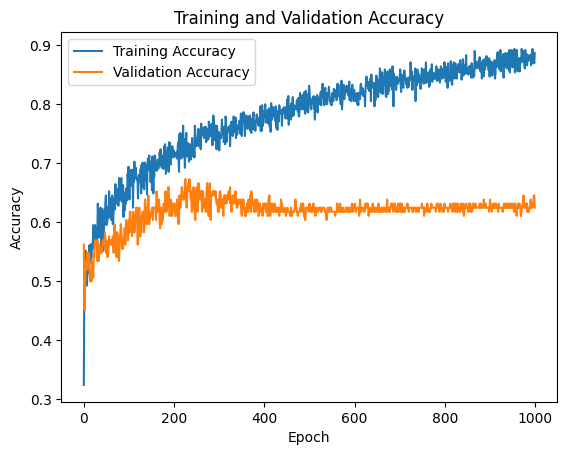

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

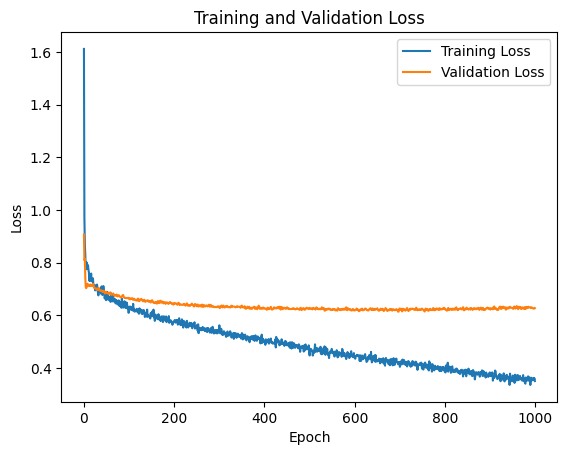

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
scores =  model.evaluate(x_test,y_test)
print(f"Test Accuracy : {scores[1]*100}")

3/3 [==============================] - 2s 34ms/step - loss: 0.5721 - accuracy: 0.6875
Test Accuracy : 68.75


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 55ms/step


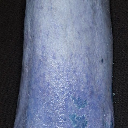

In [ ]:
img = array_to_img(x_test[5])
img

In [ ]:
labels = lb.classes_
print(labels)
print('Original : ',labels[np.argmax(y_test[5])])
print('Predicted : ',labels[np.argmax(y_pred[5])])

print('Original : ',labels[np.argmax(y_test[1])])
print('Predicted : ',labels[np.argmax(y_pred[1])])

print('Original : ',labels[np.argmax(y_test[6])])
print('Predicted : ',labels[np.argmax(y_pred[6])])

print('Original : ',labels[np.argmax(y_test[4])])
print('Predicted : ',labels[np.argmax(y_pred[4])])

print('Original : ',labels[np.argmax(y_test[2])])
print('Predicted : ',labels[np.argmax(y_pred[2])])

print('Original : ',labels[np.argmax(y_test[3])])
print('Predicted : ',labels[np.argmax(y_pred[3])])


print('Original : ',labels[np.argmax(y_test[7])])
print('Predicted : ',labels[np.argmax(y_pred[7])])

print('Original : ',labels[np.argmax(y_test[8])])
print('Predicted : ',labels[np.argmax(y_pred[8])])

print('Original : ',labels[np.argmax(y_test[45])])
print('Predicted : ',labels[np.argmax(y_pred[45])])

['Ecz' 'Pso']
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz
Original :  Ecz
Predicted :  Ecz


In [ ]:
from sklearn import metrics


pred_y = np.argmax(y_pred, axis=1)

test_y = np.argmax(y_test, axis=1)



# Print the confusion matrix
print(metrics.confusion_matrix(test_y, pred_y))

[[42 38]
 [ 0  0]]


In [ ]:
y_test
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is your true labels
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[42 38]
 [ 0  0]]


In [ ]:
print(pred_y)
print(test_y)
print(y_test)

[0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 0 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]


In [ ]:
print(metrics.confusion_matrix(test_y, pred_y))

[[42 38]
 [ 0  0]]


In [ ]:
print(metrics.classification_report(test_y, pred_y, digits = 3))

              precision    recall  f1-score   support

           0      1.000     0.525     0.689        80
           1      0.000     0.000     0.000         0

    accuracy                          0.525        80
   macro avg      0.500     0.263     0.344        80
weighted avg      1.000     0.525     0.689        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.525
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[42 38]
 [ 0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 52ms/step


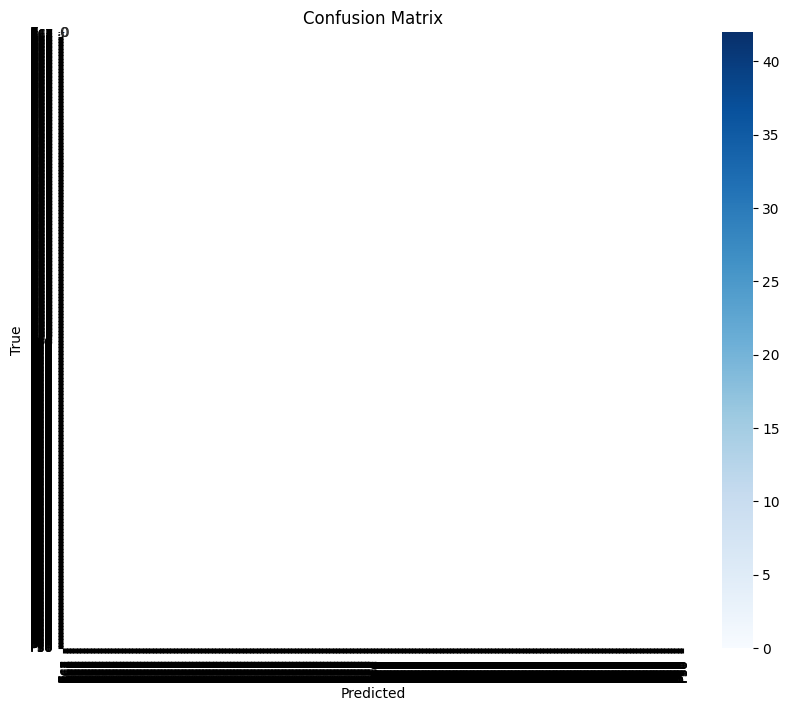

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
label_list

array(['Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz', 'Ecz',
       'Ecz', 'Ecz',

In [ ]:
print(metrics.classification_report(test_y, pred_y, digits=3))

NameError: ignored

In [ ]:
model.save('/content/drive/MyDrive/VGG16_for_Eczpso_80.h5')

NameError: ignored